In [2]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sb
import csv
from scipy import constants
from tqdm import tqdm
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo
from astropy import constants as const
import astropy.units as u
from units import unit
from astropy.cosmology import Planck18, z_at_value
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
pl.rcParams['figure.figsize'] = (16, 9)
pl.style.use('ggplot')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#
from mlxtend.plotting import plot_linear_regression

In [3]:
df = pd.read_csv('LIGO_events')
print(df)
df.shape
df.head()

                    id       commonName  version catalog.shortName  \
0   GW190408_181802-v1  GW190408_181802        1            GWTC-2   
1          GW190412-v3         GW190412        3            GWTC-2   
2   GW190413_052954-v1  GW190413_052954        1            GWTC-2   
3   GW190413_134308-v1  GW190413_134308        1            GWTC-2   
4   GW190421_213856-v1  GW190421_213856        1            GWTC-2   
5   GW190424_180648-v1  GW190424_180648        1            GWTC-2   
6          GW190425-v2         GW190425        2            GWTC-2   
7   GW190426_152155-v1  GW190426_152155        1            GWTC-2   
8   GW190503_185404-v1  GW190503_185404        1            GWTC-2   
9   GW190512_180714-v1  GW190512_180714        1            GWTC-2   
10  GW190513_205428-v1  GW190513_205428        1            GWTC-2   
11  GW190514_065416-v1  GW190514_065416        1            GWTC-2   
12  GW190517_055101-v1  GW190517_055101        1            GWTC-2   
13  GW190519_153544-

,id,commonName,version,catalog.shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,chirp_mass_upper,redshift,redshift_lower,redshift_upper,far,far_lower,far_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW190408_181802-v1,GW190408_181802,1,GWTC-2,1.238783e+09,/GWTC-2/,https://www.gw-openscience.org/eventapi/json/G...,24.5,-3.4,5.1,...,1.4,0.30,-0.10,0.06,0.000010,NaN,NaN,41.0,-2.7,3.8
1,GW190412-v3,GW190412,3,GWTC-2,1.239082e+09,/GWTC-2/,https://www.gw-openscience.org/eventapi/json/G...,30.0,-5.1,4.7,...,0.2,0.15,-0.03,0.03,0.000010,NaN,NaN,37.3,-3.9,3.9
2,GW190413_052954-v1,GW190413_052954,1,GWTC-2,1.239169e+09,/GWTC-2/,https://www.gw-openscience.org/eventapi/json/G...,33.4,-7.4,12.4,...,8.0,0.66,-0.27,0.30,0.071683,NaN,NaN,54.3,-8.4,12.4
3,GW190413_134308-v1,GW190413_134308,1,GWTC-2,1.239198e+09,/GWTC-2/,https://www.gw-openscience.org/eventapi/json/G...,45.4,-9.6,13.6,...,8.5,0.80,-0.31,0.30,0.043657,NaN,NaN,72.8,-10.3,15.2
4,GW190421_213856-v1,GW190421_213856,1,GWTC-2,1.239918e+09,/GWTC-2/,https://www.gw-openscience.org/eventapi/json/G...,40.6,-6.6,10.4,...,6.8,0.53,-0.21,0.18,0.000774,NaN,NaN,68.6,-8.1,11.7


In [4]:
df.describe()

,version,GPS,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,...,chirp_mass_upper,redshift,redshift_lower,redshift_upper,far,far_lower,far_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
count,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,0.0,...,39.000000,39.000000,39.000000,39.000000,39.000000,0.0,0.0,37.000000,37.000000,37.000000
mean,1.153846,1.245505e+09,35.730769,-7.107692,11.182051,23.345897,-6.504872,6.668718,12.265800,NaN,...,6.278482,0.404872,-0.159231,0.184077,0.151349,NaN,NaN,59.116216,-7.413514,11.751351
std,0.488740,4.756390e+06,18.884262,4.429351,8.647783,13.867334,4.490948,4.636600,3.533378,NaN,...,7.998497,0.230513,0.099773,0.137026,0.390750,NaN,NaN,28.752850,4.681356,9.863164
min,1.000000,1.238783e+09,2.000000,-18.900000,0.600000,1.400000,-20.700000,0.080000,7.993908,NaN,...,0.000800,0.030000,-0.370000,0.009000,0.000010,NaN,NaN,13.300000,-20.000000,1.000000
25%,1.000000,1.241768e+09,23.500000,-9.250000,6.250000,11.350000,-8.300000,2.700000,9.957287,NaN,...,0.450000,0.185000,-0.240000,0.070000,0.000010,NaN,NaN,37.300000,-9.800000,5.200000
50%,1.000000,1.245956e+09,36.100000,-6.700000,9.600000,24.800000,-6.500000,6.700000,12.099600,NaN,...,5.300000,0.380000,-0.130000,0.140000,0.000019,NaN,NaN,57.800000,-7.900000,9.400000
75%,1.000000,1.248726e+09,43.050000,-3.650000,12.950000,30.950000,-2.650000,8.600000,13.115565,NaN,...,7.750000,0.605000,-0.070000,0.280000,0.030013,NaN,NaN,70.700000,-3.900000,15.200000
max,3.000000,1.253886e+09,91.400000,-0.300000,50.700000,66.800000,-0.090000,20.700000,24.384109,NaN,...,36.100000,0.800000,-0.010000,0.610000,1.559222,NaN,NaN,150.300000,-0.900000,52.500000


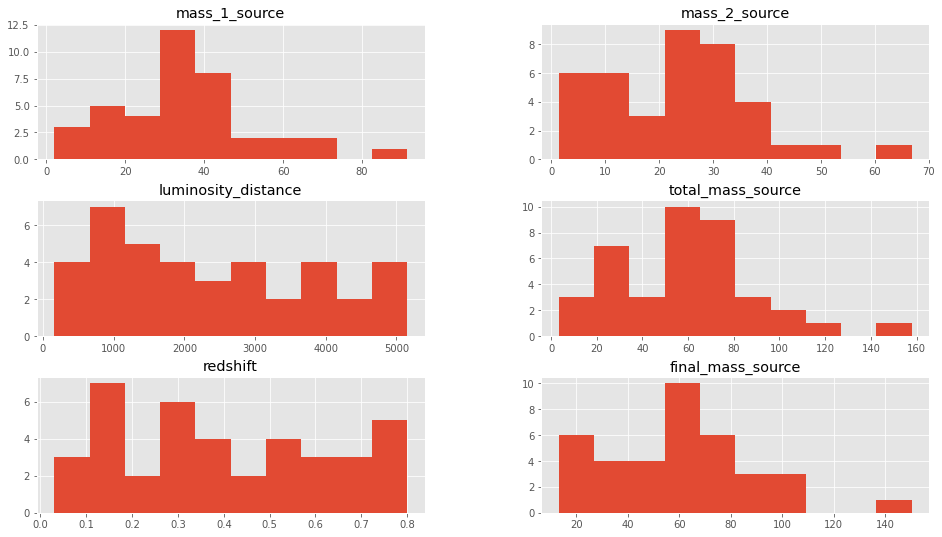

In [12]:
# Visualizamos rápidamente las caraterísticas de entrada
df.drop(['id','version','GPS', 'mass_1_source_lower', 'mass_1_source_upper',
         'mass_2_source_lower', 'mass_2_source_upper', 'network_matched_filter_snr',
         'network_matched_filter_snr_lower', 'chirp_mass', 'redshift_lower', 'redshift_upper',
         'far','far_lower','far_upper','final_mass_source_lower','final_mass_source_upper',
         'chirp_mass_upper','chirp_mass_lower','reference','jsonurl','catalog.shortName','chirp_mass_source',
         'chirp_mass_source_lower','chirp_mass_source_upper','network_matched_filter_snr_upper','luminosity_distance_lower',
         'luminosity_distance_upper','chi_eff','chi_eff_lower','chi_eff_upper','total_mass_source_lower','total_mass_source_upper'],1).hist()
pl.savefig('input_characteristics.png', dpi=300, bbox_inches='tight')
pl.show()

In [6]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
print(cosmo.age(0))
#e = [0.5,  0.2,  0.1,  0.05,  0.01] #Excentricity array of datas
e = 0.1 #Half
a = [0.1] #Half Separation
#a = [0.001, 0.01, 0.1, 1, 7.63] #Separation in AU, the last one is 1pc = 208232 UA
omega_m = 0.321


def F(e): #Celoria's Equation (2.13) 
	F = (1-e**2)**(-3.5)*(1 + (73/24)*e**2 + (37/96)*e**4)
	return F

	
def t_coal(M1, M2, a, F): #Celoria's Equation (2.17)
	t = (5/256)*(const.c**5/const.G**3)*(((a*u.au).to(u.meter))**4 / (M1*M2*(M1 + M2)))*(1/F) #I did use a convertion AU to Meter to eliminate units from const.G
	return t #this variable has seconds units

def Rs(M): #Schwarzschild radius equation
    R = 2*const.G*M/(const.c**2)
    return R

#def Z(D): #Redshift from Luminosity Distance
#    z = (H0/const.c)*D
#    return z

def integrand(z):
    omega_r = 8.070427106422706e-5 
    omega_m = 0.3
    omega_lmd = (0.7 - 8.070427106422706e-5)
    omega_k = 0
    return 1/((1+z)*((omega_r*((1+z)**4)) + 
                     (omega_m*((1+z)**3)) + 
                     (omega_lmd) + 
                     (omega_k*((1+z)**2)))**(1/2))


#def t_cosmic(z):
#    y = (1-omega_m)/(omega_m*(1+z))
#    g = omega_m/((1-omega_m)**(1.5))
#    h = (y*(1+y))**(0.5)
#    k = 1/math.sinh(y**(0.5))
#    t_c = (1/H0)*g*(h+k)
#    t_c = cosmo.age(0)*g*(h+k)
#    return t_c
#    return (t_c*(3.086e+19*u.km)/u.megaparsec).to(u.Gyr)

#(omega_m/(omega_m - 1)**(3/2))*[(1/np.sin(x**(1/2)))-[(x**(1/2)*(1-x)**1/2)]
#

13.786885302009708 Gyr


In [7]:
data_row=[]
with open('LIGO_events', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',', quotechar=':')
    for row in reader:
            string=[row['commonName'], row['mass_1_source'],
                    row['mass_2_source'], row['luminosity_distance'], 
                    row['redshift'], row['final_mass_source']] #If I need to get a new row only write its name
            data_row.append(string)
m_min = []
m_max = []
cosmic_time = []
coal_time = []
pr_z=[]
for i in range(len(data_row)):
    event = data_row[i]
    date = event[0]
    mass1 = float(event[1])*const.M_sun
    mass2 = float(event[2])*const.M_sun
    dist_lum = float(event[3])*u.megaparsec
    redshift = float(event[4])
#final_mass = float(event[5])*const.M_sun #not neccesary yet and we have events without final_mass. 
#I need to a new sentence to solve that
    if mass1 > mass2: #Conditional sentece to choose the mass mini and mass max
        m_min.append(mass2/u.kg)
        m_max.append(mass1/u.kg)
    elif mass2 > mass1:
        m_min.append(mass1/u.kg)
        m_max.append(mass2/u.kg)
    print("LIGO Event:", event , "    Half Exectricity   e =", e)
    for j in a: #For each value of Separation ###IMPORTANT CORREGIR DESDE AQUI
        time = t_coal(mass1, mass2,j,F(e))
        coal_time.append(time.to(u.year)/u.year)#save each value of t_coal in t_array[]
        dl = dist_lum
        pr_z.append(redshift)
        red_Z = redshift
        I, err = quad(integrand, 0, red_Z)#integral to get cosmic time
        cosmic_time.append((cosmo.age(0) - I*cosmo.age(0))/u.Gyr)#save each value of integral from redshift to each event
        print("T_coal=", time.to(u.Gyr)) #convertion Seconds to Years
        print("Schwarzschild radius to M1, R =", (Rs(mass1).to(u.km)), "and M2, R =", (Rs(mass2).to(u.km)))
        print("Redshift=",red_Z)
        print("Cosmic Time=", (cosmo.age(0) - I*cosmo.age(0)))#comsmo.age(0) is 1/Ho constant into integral 
    print("\n")

LIGO Event: ['GW190408_181802', '24.5', '18.3', '1580.0', '0.3', '41.0']     Half Exectricity   e = 0.1
T_coal= 1.5679400447303082 Gyr
Schwarzschild radius to M1, R = 72.35462686445612 km and M2, R = 54.044476392634564 km
Redshift= 0.3
Cosmic Time= 10.413093737630266 Gyr


LIGO Event: ['GW190412', '30.0', '8.3', '740.0', '0.15', '37.3']     Half Exectricity   e = 0.1
T_coal= 3.1549484974411346 Gyr
Schwarzschild radius to M1, R = 88.5975022830075 km and M2, R = 24.511975631632076 km
Redshift= 0.15
Cosmic Time= 11.925229214641389 Gyr


LIGO Event: ['GW190413_052954', '33.4', '23.4', '4100.0', '0.66', '54.3']     Half Exectricity   e = 0.1
T_coal= 0.6777659320116286 Gyr
Schwarzschild radius to M1, R = 98.63855254174834 km and M2, R = 69.10605178074584 km
Redshift= 0.66
Cosmic Time= 7.792707599544442 Gyr


LIGO Event: ['GW190413_134308', '45.4', '30.9', '5150.0', '0.8', '72.8']     Half Exectricity   e = 0.1
T_coal= 0.28109396716177465 Gyr
Schwarzschild radius to M1, R = 134.07755345495136

T_coal= 0.6331224272241378 Gyr
Schwarzschild radius to M1, R = 93.91335241998793 km and M2, R = 76.48917697099645 km
Redshift= 0.4
Cosmic Time= 9.56081252983718 Gyr


LIGO Event: ['GW190828_065509', '23.8', '10.2', '1660.0', '0.31', '32.9']     Half Exectricity   e = 0.1
T_coal= 3.6453090119928273 Gyr
Schwarzschild radius to M1, R = 70.28735181118594 km and M2, R = 30.123150776222545 km
Redshift= 0.31
Cosmic Time= 10.322730231364066 Gyr


LIGO Event: ['GW190909_114149', '43.2', '27.6', '4770.0', '0.75', '68.3']     Half Exectricity   e = 0.1
T_coal= 0.35642184054629095 Gyr
Schwarzschild radius to M1, R = 127.58040328753077 km and M2, R = 81.5097021003669 km
Redshift= 0.75
Cosmic Time= 7.3003687780823 Gyr


LIGO Event: ['GW190910_112807', '43.5', '35.1', '1570.0', '0.29', '75.0']     Half Exectricity   e = 0.1
T_coal= 0.2507098953794665 Gyr
Schwarzschild radius to M1, R = 128.46637831036085 km and M2, R = 103.65907767111877 km
Redshift= 0.29
Cosmic Time= 10.504666186996385 Gyr


LIGO Ev

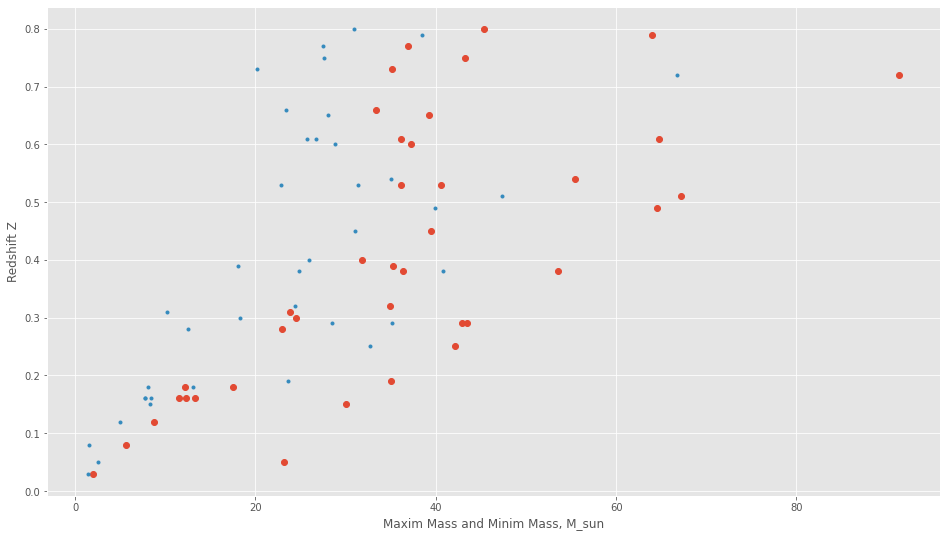

In [13]:
#coal_time---> coalesence time
#cosmic_time ----> cosmic time
#m_max ---> array of Maximum Mass
#m_min ---> array of Minimum Mass

#pl.figure(figsize=(15,8))
#pl.plot(m_max/const.M_sun, cosmic_time,'o')
pl.plot(m_max/const.M_sun, pr_z,'o')
#pl.xlabel("Coalesence Time")
pl.xlabel("Maxim Mass and Minim Mass, M_sun")
#pl.ylabel("Cosmic Time, Gyr")
pl.ylabel("Redshift Z")
#pl.xscale("log")
#pl.yscale("log")
#pl.plot(m_min/const.M_sun, cosmic_time,'.')
pl.plot(m_min/const.M_sun, pr_z,'.')
#pl.xlabel("Minimum Mass, M_sun")
#pl.ylabel("Cosmic Time, Gyr")
pl.savefig('Z_vs_Masses.png', dpi=300, bbox_inches='tight')
pl.show()

Coefficients: [[-0.0705118]]
Independent term: [12.30684449]
Mean squared error: 1.62
Variance score: 0.52


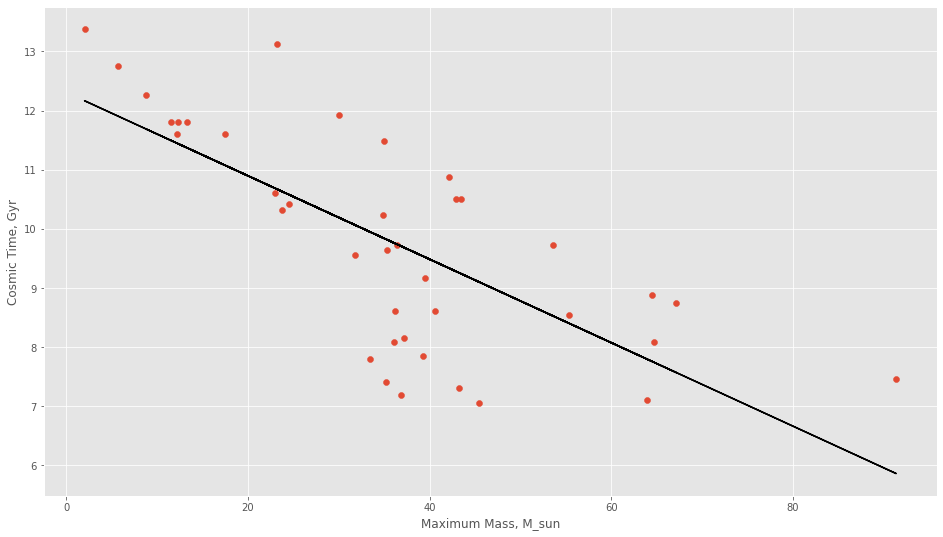

In [10]:
#x = np.array([m_min/const.M_sun]).reshape(-1,1)
#quitar la x_max y hacer global la y_max a "y" es el tiempo cosmico
x_max = np.array([m_max/const.M_sun]).reshape(-1,1)
y = np.array([cosmic_time]).reshape(-1,1)
model = LinearRegression().fit(x_max,y)
r_sq = model.score(x_max,y)
y_pred = model.predict(x_max)
#print('coefficient of determination:', r_sq)
print('Coefficients:', model.coef_)
print('Independent term:',model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y, y_pred))
#print('predicted response:', y_pred, sep='\n')
pl.scatter(x_max,y)
pl.plot(x_max,y_pred, color='black')
pl.xlabel("Maximum Mass, M_sun")
pl.ylabel("Cosmic Time, Gyr")
pl.savefig('Linear_Regression_MaximumMass.png', dpi=300, bbox_inches='tight')
pl.show()

Coefficients: 
 [[-0.09565905]]
Independent term: 
 [12.02065021]
Mean squared error: 1.64
Variance score: 0.51


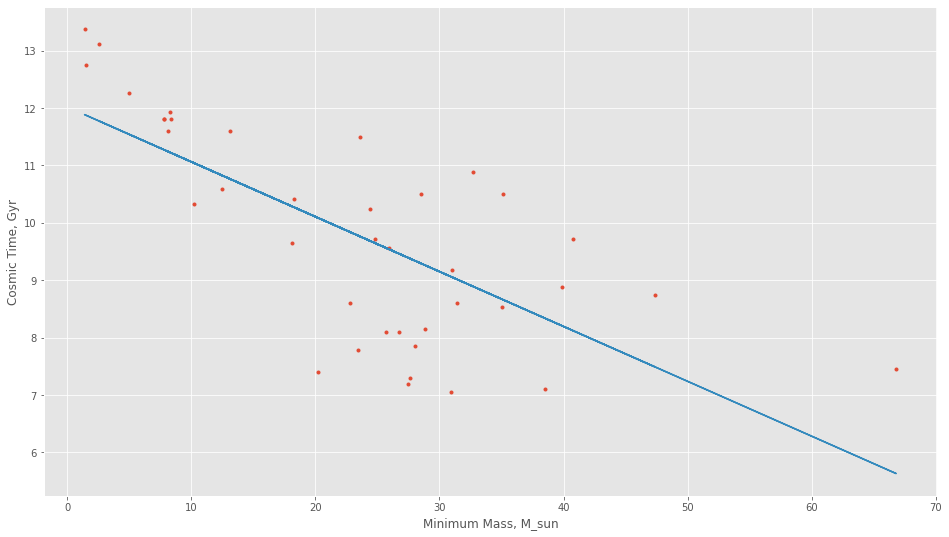

In [11]:
x_min = np.array([m_min/const.M_sun]).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x_min,y)
y_pred = regr.predict(x_min)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y, y_pred))
pl.plot(x_min,y,'.')
pl.plot(x_min, regr.coef_*x_min + regr.intercept_)
pl.xlabel("Minimum Mass, M_sun")
pl.ylabel("Cosmic Time, Gyr")
pl.savefig('Linear_Regression_MinimumMass.png', dpi=300, bbox_inches='tight')
pl.show()